In [18]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error

In [19]:
im = Image.open('plot4.png').convert('L') # opening image and converting into grayscale
size_x, size_y = im.size # getting size of the image

im_array = np.array(im) # converting the image into an array
data = []
for i,row in enumerate(im_array): # restructuring the image data into x, y, color/white
    for j,column in enumerate(row):
        data.append([j,size_y-i,column/255])
df = pd.DataFrame(data, columns=['x', 'y', 'col']) # converting data into pandas DataFrame

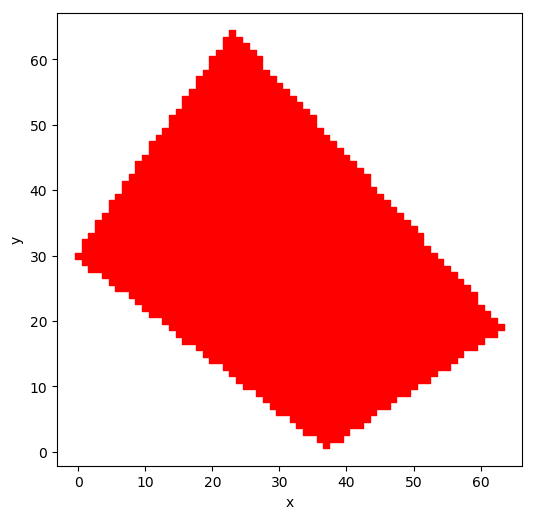

In [23]:
plt.figure(figsize=(6,6),dpi=100)
df[df['col']==0].plot.scatter('x', 'y', c='red', marker=",", ax=plt.gca()) # plotting the image

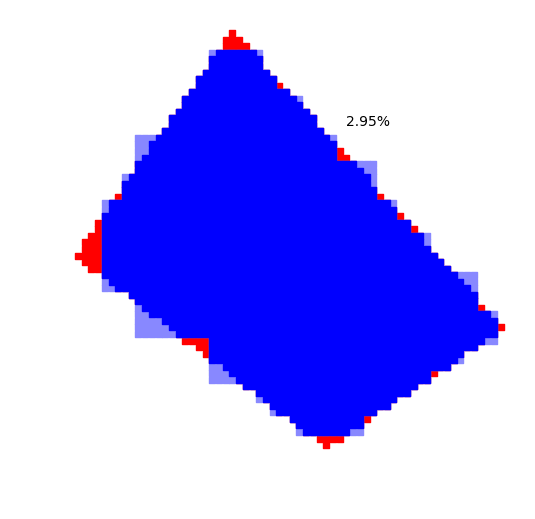

In [24]:
dt = DecisionTreeClassifier(max_depth=8, max_features=None) # training a decision tree

X = df[['x','y']] # features
y = df[['col']] # dependent variable

dt.fit(X,y) # fitting
pred = dt.predict(X) # calculating predictions
err = mean_absolute_error(y, pred) * 100 # calculcating error

plt.figure(figsize=(6,6), dpi=100)
plt.axis('off')
plt.annotate("%0.2f%%" % err, xy=(40,50)) # adding label with the error
plt1 = df[df['col']==0].plot.scatter('x', 'y', c='red', marker=",", ax=plt.gca()) # plotting the original image in red
plt2 = df[pred==0].plot.scatter('x', 'y', c='#8888ff', marker=",", ax=plt1) # plotting the predictions in transparent blue
plt3 = df[(df['col']==0) & (pred==0)].plot.scatter('x', 'y', c="#0000ff", marker=",", ax=plt2) # plotting the correct predicitons in solid blue

/home/pawelek/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


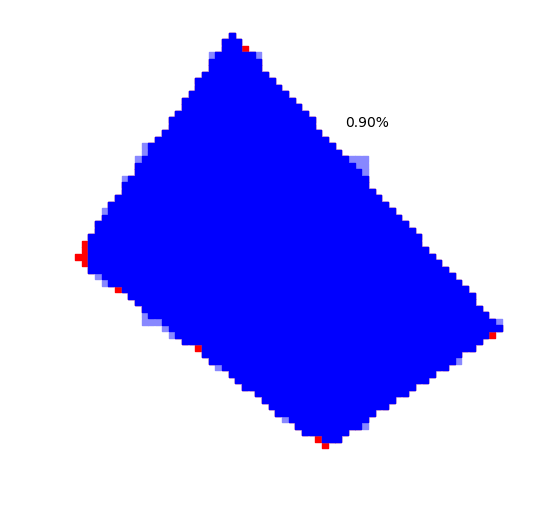

In [32]:
rf = RandomForestClassifier(n_estimators=20, max_depth=8, bootstrap=True, max_features=None) #training a random forest

rf.fit(X,y)
pred = rf.predict(X)
err = mean_absolute_error(y, pred) * 100

plt.figure(figsize=(6,6),dpi=100)
plt.axis('off')
plt.annotate("%0.2f%%" % err, xy=(40,50))
plt1 = df[df['col']==0].plot.scatter('x', 'y', c='red', marker=",", ax=plt.gca())
plt2 = df[pred==0].plot.scatter('x', 'y', c='#8888ff', marker=",", ax=plt1)
plt3 = df[(df['col']==0) & (pred==0)].plot.scatter('x', 'y', c="#0000ff", marker=",", ax=plt2)

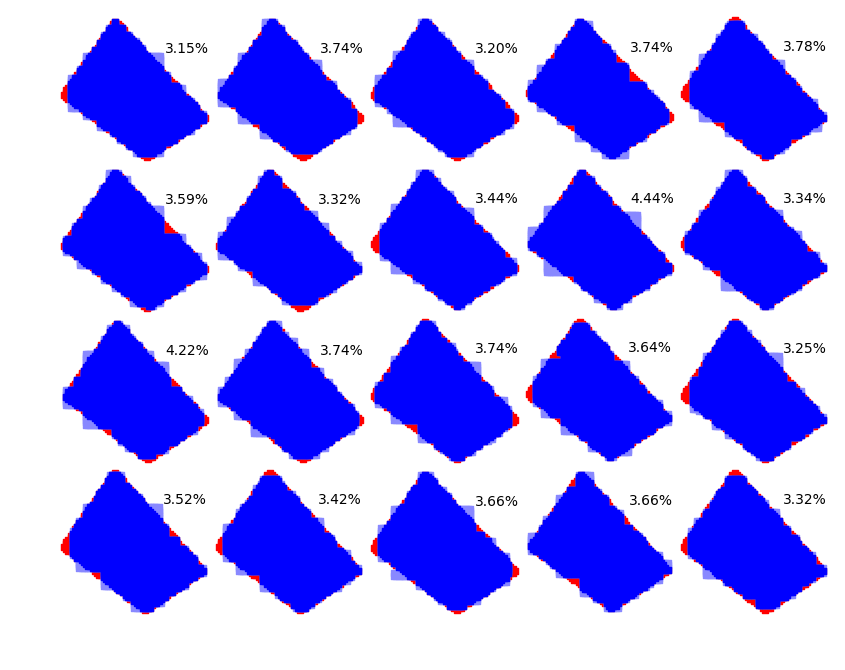

In [33]:
fig, axis = plt.subplots(4,5, figsize=(10,8), dpi=100) # creating a multiplot
fig.subplots_adjust(hspace = 0, wspace=0) # removing whitespace inbetween the plots

for i in range(20): # for each estimator
    pred = rf.estimators_[i].predict(X)
    err = mean_absolute_error(y, pred)*100
    
    plt.subplot(4,5,i+1)
    plt.axis('off')
    plt.annotate("%0.2f%%" % err, xy=(45,50))
    plt1 = df[df['col']==0].plot.scatter('x', 'y', c='red', marker=",", ax=plt.gca())
    plt2 = df[pred==0].plot.scatter('x', 'y', c='#8888ff', marker=",", ax=plt1)
    plt3 = df[(df['col']==0) & (pred==0)].plot.scatter('x', 'y', c="#0000ff", marker=",", ax=plt2)

In [39]:
# Calculating error wrt max_depth of trees
err_dt = [] # for single decision tree
err_rf_20 = [] # for random forest
err_trees_mean = [] # averaged error of rf's estimators
depth_range = range(1,15)

for depth in depth_range:
    dt = DecisionTreeClassifier(max_depth=depth, max_features=None)
    dt.fit(X, y)
    err_dt.append(mean_absolute_error(y, dt.predict(X)) * 100)
    
    rf_20 = RandomForestClassifier(n_estimators=20, max_depth=depth, bootstrap=True, max_features=None)
    rf_20.fit(X, y)
    err_rf_20.append(mean_absolute_error(y, rf_20.predict(X)) * 100)

    err_trees = []
    for i in range(20):
        err_trees.append(mean_absolute_error(y, rf_20.estimators_[i].predict(X)) * 100)
    err_trees_mean.append(np.mean(err_trees))

/home/pawelek/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/home/pawelek/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/home/pawelek/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/home/pawelek/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

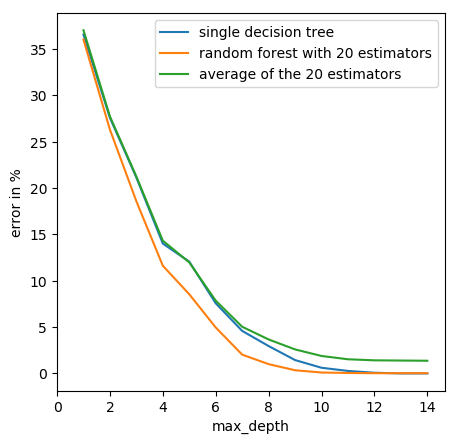

In [40]:
# Plotting the errors from previous cell
plt.figure(figsize=(5,5), dpi=100)

plt.plot(depth_range, err_dt, label="single decision tree")
plt.plot(depth_range, err_rf_20, label="random forest with 20 estimators")
plt.plot(depth_range, err_trees_mean, label="average of the 20 estimators")

plt.xlabel("max_depth")
plt.xticks(np.arange(0, 15, step=2))
plt.ylabel("error in %")
plt.legend(loc='upper right')